### Задание 1:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная: 

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [4]:
# диагональная ортогональная
import numpy as np
import math
m = np.array([[math.cos(1), - math.sin(1)],
              [math.sin(1), math.cos(1)]])
print(m)

[[ 0.54030231 -0.84147098]
 [ 0.84147098  0.54030231]]


In [5]:
m.T

array([[ 0.54030231,  0.84147098],
       [-0.84147098,  0.54030231]])

In [6]:
m_inv = np.linalg.inv(m)
print(m_inv)
# m_inv = m.T

[[ 0.54030231  0.84147098]
 [-0.84147098  0.54030231]]


In [7]:
m[0][0] ** 2 + m[0][1] ** 2

1.0

In [8]:
m [0][0] * m [0][1] + m [1][0] * m [1][1]

0.0

In [64]:
# верхнетреугольная, ортогональная
m = np.triu([[1 / np.sqrt(2), - 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)]], 0)
print(m)

[[0.71 -0.71]
 [0.00 0.71]]


In [10]:
# нижнетреугольная, ортогональная
m = np.tril([[1 / np.sqrt(2), - 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)]], 0)
print(m)

[[0.70710678 0.        ]
 [0.70710678 0.70710678]]


In [66]:
# матрица, у которой определитель = 1, и все элементы не равны 0
m = np.array([[1 / np.sqrt(2), - 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)]])
m

array([[0.71, -0.71],
       [0.71, 0.71]])

In [67]:
np.linalg.det(m)

0.9999999999999998

In [70]:
# матрица (3x3), у которой определитель = 1
m = np.array([[0,0,1],[1,0,0], [0,1,0]])
m

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [71]:
np.linalg.det(m)

1.0

### Задание 2:

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [72]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [73]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89 0.45]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.71 -0.71]


#Найти собственные числа
#lambda ** 2 - 5 * lambda + 4  = 0
#(5 +/- np.sqrt (25 - 4 * 1 * 4)) / 2 * 1 
#(5 + 3) / 2 = 4
#(5 - 3) / 2 = 1
#Собственные числа сопадают с решением numpy

### Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [74]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [75]:
a, U = linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.24 4.24]

Eigenvectors:
[[-0.85 -0.53]
 [0.53 -0.85]]


In [76]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1.00 2.00]
 [2.00 3.00]]


In [77]:
u, s, v = np.linalg.svd(m)

In [78]:
u

array([[-0.53, -0.85],
       [-0.85, 0.53]])

In [79]:
s

array([4.24, 0.24])

In [80]:
v

array([[-0.53, -0.85],
       [0.85, -0.53]])

### Задание 4:

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE. 

In [88]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [83]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [84]:
X, y = load_digits(return_X_y=True)

In [85]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [90]:
pca = PCA(n_components=10)

In [91]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [94]:
X_hat = pca.inverse_transform(pca.transform(X))
mse = ((X_hat - X)**2).mean(axis=None)
print(mse)

4.9142984688754945


In [130]:
def pca_mse(n):
    pca = PCA(n_components=n, whiten=True)
    pca.fit(X)
    #X_red = pca.transform(X)
    X_hat = pca.inverse_transform(pca.transform(X) )
    mse = ((X_hat - X)**2).mean(axis=None)
    return mse

In [165]:
mses = []
N = 50
for i in range(0,N):
    m = pca_mse(i)
    print(i,m)
    mses.append((m))
mses = np.array(mses)

0 18.773105271290895
1 15.977678462234742
2 13.421012200761572
3 11.206800697129458
4 9.62798640714143
5 8.542447615318274
6 7.6193908656404465
7 6.809150143851631
8 6.1218035333310326
9 5.492287130062149
10 4.91429766914227
11 4.468940337285169
12 4.0422967397423575
13 3.700321644843467
14 3.3672673834026035
15 3.0919590322706623
16 2.8272178083605635
17 2.5796971948627756
18 2.3453684364183807
19 2.1543203636707013
20 1.9843614805837013
21 1.817296676797418
22 1.6676654818833005
23 1.5235917017836489
24 1.3878848782688533
25 1.2572066846814336
26 1.1452996555310984
27 1.0372504495929262
28 0.9405686596923729
29 0.8486396980332247
30 0.7680994592488635
31 0.697973168327025
32 0.6316641712892839
33 0.5684435230080905
34 0.506851645070277
35 0.4489706980461663
36 0.3938173074252808
37 0.34564637881820115
38 0.3028931216974791
39 0.2611634030528636
40 0.22147132289694668
41 0.18581949479365797
42 0.15603541761847048
43 0.1276580039930355
44 0.10126700469810139
45 0.07937337936466572
46 0

In [166]:
x = np.linspace(0, 49)
y = mses

In [167]:
x.shape

(50,)

In [168]:
x

array([0.00, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00, 9.00, 10.00,
       11.00, 12.00, 13.00, 14.00, 15.00, 16.00, 17.00, 18.00, 19.00,
       20.00, 21.00, 22.00, 23.00, 24.00, 25.00, 26.00, 27.00, 28.00,
       29.00, 30.00, 31.00, 32.00, 33.00, 34.00, 35.00, 36.00, 37.00,
       38.00, 39.00, 40.00, 41.00, 42.00, 43.00, 44.00, 45.00, 46.00,
       47.00, 48.00, 49.00])

In [169]:
mses.shape

(50,)

In [170]:
y

array([18.77, 15.98, 13.42, 11.21, 9.63, 8.54, 7.62, 6.81, 6.12, 5.49,
       4.91, 4.47, 4.04, 3.70, 3.37, 3.09, 2.83, 2.58, 2.35, 2.15, 1.98,
       1.82, 1.67, 1.52, 1.39, 1.26, 1.15, 1.04, 0.94, 0.85, 0.77, 0.70,
       0.63, 0.57, 0.51, 0.45, 0.39, 0.35, 0.30, 0.26, 0.22, 0.19, 0.16,
       0.13, 0.10, 0.08, 0.06, 0.04, 0.03, 0.02])

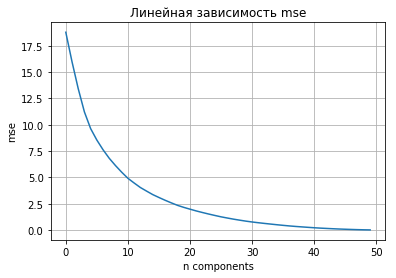

In [171]:
plt.title("Линейная зависимость mse") 
plt.xlabel("n components")
plt.ylabel("mse") 
plt.grid() 
plt.plot(x, y)